<a href="https://colab.research.google.com/github/RossPereira/SegmentacaoClientes/blob/main/SegmentacaoDeClientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problema de negócio:**

## **CARREGANDO DADOS, BIBLIOTECAS, ANÁLISES DESCRITIVAS**

**Importando as bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Base Disponivel em: https://www.kaggle.com/arjunbhasin2013/ccdata

**Descrição das Varáveis:**

* Balance: Saldo para fazer compras
* Balance_Frequency: Frequência que o saldo é atualizado (1= Frequente, 0= não frequente)
* Purchases: Quantidade de compras realizadas
* OneOffPurchases: Quantidade de compras feitas de uma só vez (sem parcelar)
* Installments_Purchases: Quantidade de compras parceladas
* Cash_advance: Saque com cartao de crédito
* Purchase_Frequency: Frequência de compras(entre 0 e 1)
* Oneoff_Purchase_Frequency: Frequência de compras a vista (entre 0 e 1)
* Purchases_Installments_Frequency: Frequência de compras parceladas (entre 0 e 1)
* Cash_Advance_Frequency: Frequência de saques adiantados
* Cash_Advance_TRX: Número de transações feitas cash in advance
* Purchases_TRX: Número de compras
* Credit_Limit: Limite do cartão
* Payments: Valor Pago
* Minimum_Payments: Valor Mínimo pago
* PRC_Full_Payment: Percentual de pagamentos em que a fatura foi paga completamente.
* Tenure: Posse do titular

In [2]:
baseLink = "https://raw.githubusercontent.com/RossPereira/SegmentacaoClientes/main/Bases/Base.csv"
base = pd.read_csv(baseLink)
pd.set_option('display.max_columns', None)

In [3]:
base.shape

(8950, 18)

In [4]:
base.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Informações sobre as Colunas

In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
base.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## **PRÉ-PROCESSAMENTO DOS DADOS**

**Verificando Valores Nulos e N/A**

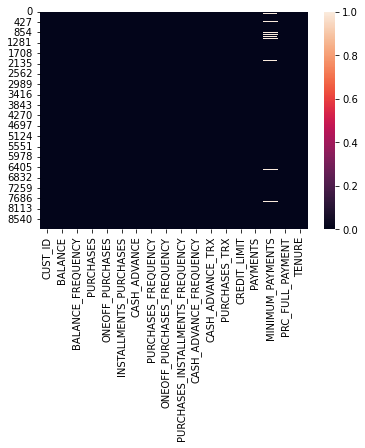

In [7]:
# visualizando Valores Nulos se existirem irão aparecer como traços brancos
sns.heatmap(base.isnull());

In [8]:
base.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Existem 313 Registros nulos na base de dados na categoria Pagamento Mínimo e 1 Registro na categoria Limite de Crédito, a estratégia escolhida para substituição desses valores será utlizar a média

In [9]:
# Verificando a média do Pagamento Mínimo
base['MINIMUM_PAYMENTS'].mean()

864.2065423050816

In [10]:
# Substituindo
base.loc[(base['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = base['MINIMUM_PAYMENTS'].mean()

In [11]:
# Verificando a média do Limite de Crédito
base['CREDIT_LIMIT'].mean()

4494.449450364621

In [12]:
base.loc[(base['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = base['CREDIT_LIMIT'].mean()

In [13]:
base.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

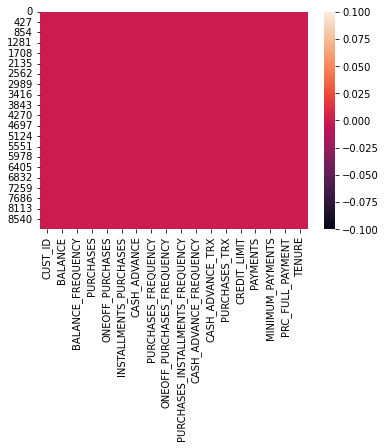

In [14]:
sns.heatmap(base.isnull());

**Verificando Valores Duplicados**

In [15]:
base.duplicated().sum()

0

In [16]:
# Removendo a coluna id
base.drop('CUST_ID', axis = 1, inplace = True)

In [17]:
base.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Verificando a distribuição dos dados na base

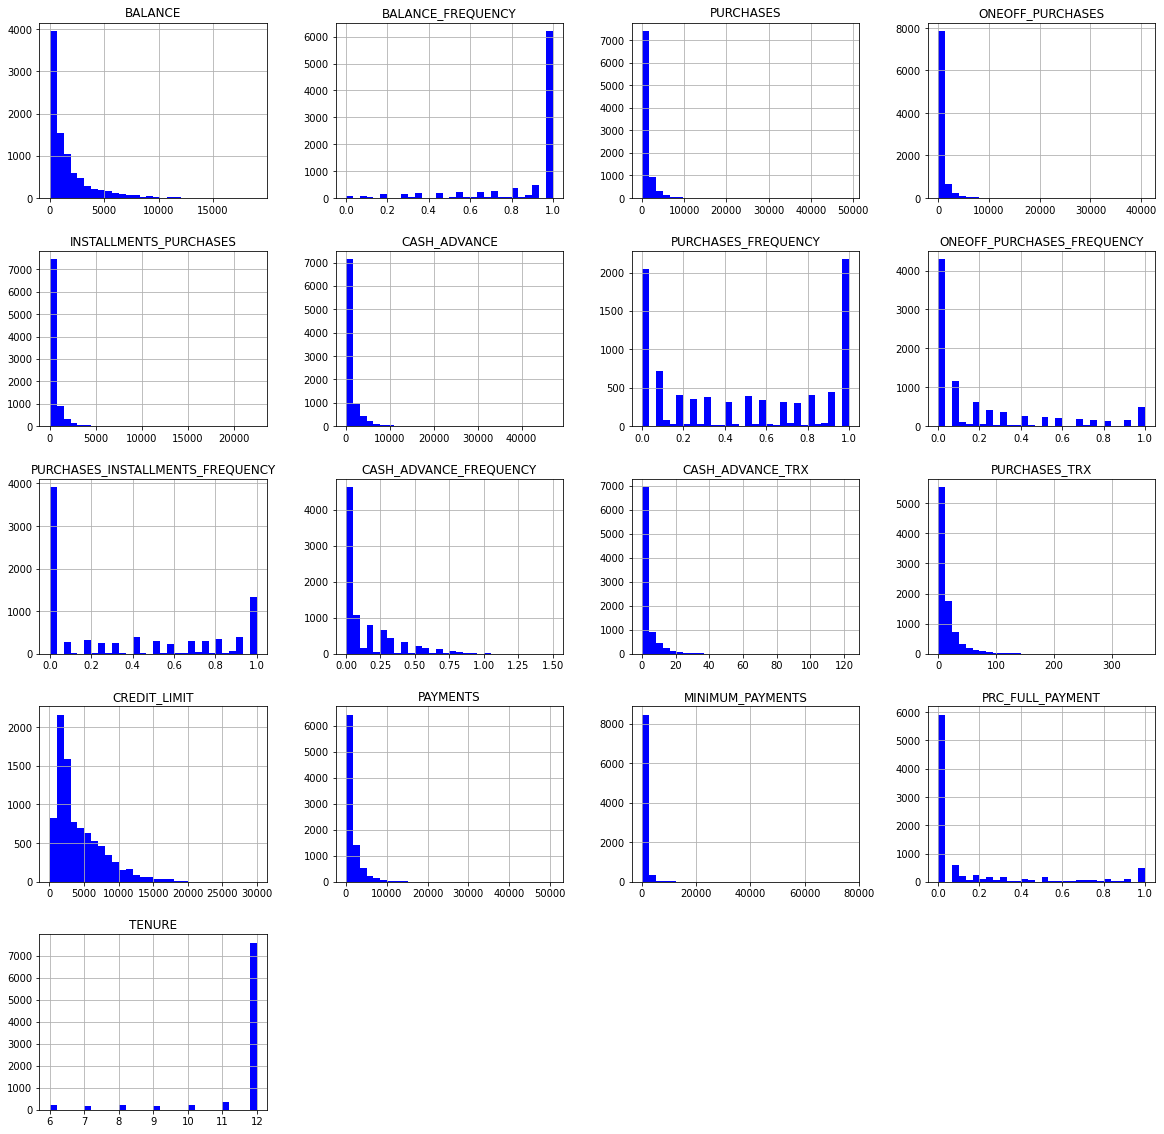

In [18]:
base.hist(bins = 30, figsize=(20,20), color = 'b');

# **CONSTRUÇÃO DA SOLUÇÃO**

##**Solução Proposta**

Será construido um modelo de Machine Learning de clusterização para divisão dos clientes na base em grupos(clusters) para que assim a empresa possa direcionar campanhas de marketing específicas para cada grupo de acordo com as características do grupo para aumentar a conversão da campanha de Black Friday.

##**Importando Bibliotecas**

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

##**Pré-Processamento dos Dados**

In [20]:
# Colocando os Dados na mesma Escala
scaler = StandardScaler()
base_Scaled = scaler.fit_transform(base)

##**Definição do número de Clusters (Grupos)**

Como a empresa não tem uma ideia do número de grupos em que deseja dividir os clientes, irei utilizar o método Elbow Method, e utilizar o algoritmo K-Means, que por sem um algoritmo de aprendizado não supervisionado, gerará a divisão em cluster automaticamente através da analise de atributos similares entre os registros

- Mais detalhes 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [21]:
# Irão ser feito testes em um intervalo de até 20 clusters, então o resultado dos testes será plotado em um gráfico
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(base_Scaled)
  wcss_1.append(kmeans.inertia_)

In [22]:
# No Gráfico nos procuramos a área em que a descida da linha começa a ser menos brusca

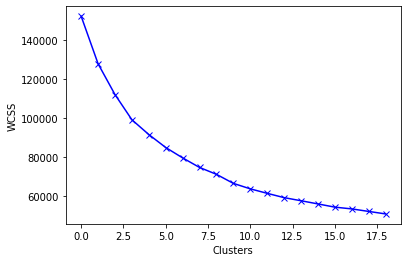

In [23]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

De Acordo com o Método de Elbow, selecionarei 8 clusters/grupos

##**Construindo o Modelo**

In [24]:
# Inicializando um modelo com 8 clusters
kmeans = KMeans(n_clusters=8)
# Inserindo os dados padronizados no modelo
kmeans.fit(base_Scaled)
labels = kmeans.labels_

In [25]:
# Verificando o numero de clientes por grupo
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([ 623, 2016, 1182, 2752,  872, 1122,   25,  358]))

In [26]:
# Criando um Dataframe para poder Analisar Melhor as Caracteristicas de Cada Feature por Grupo
cluster_Centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [base.columns])
cluster_Centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.336228,-0.347383,-0.287908,-0.214195,-0.286875,0.067425,-0.201713,-0.285924,-0.224146,0.307084,0.000231,-0.387540,-0.563820,-0.392784,-0.209266,0.014243,-3.202809
1,-0.361895,0.332243,-0.034749,-0.242428,0.363029,-0.362464,0.993884,-0.384169,1.206422,-0.473142,-0.359917,0.189681,-0.261490,-0.214243,-0.030216,0.314029,0.256155
2,-0.701251,-2.141884,-0.310520,-0.235029,-0.302316,-0.322150,-0.555316,-0.442677,-0.440150,-0.521105,-0.376272,-0.419502,-0.175348,-0.202111,-0.256754,0.281920,0.198841
3,0.012336,0.404100,-0.357063,-0.241815,-0.399903,-0.095111,-0.852829,-0.394841,-0.754250,0.102656,-0.028901,-0.481554,-0.303115,-0.250717,-0.011770,-0.455671,0.273520
4,1.683446,0.392882,-0.221106,-0.159097,-0.230581,2.010094,-0.474634,-0.210303,-0.413898,1.915248,1.921439,-0.269346,1.027564,0.818156,0.551843,-0.390382,0.070181
5,-0.136765,0.399921,0.535282,0.664172,0.045282,-0.331562,0.978531,1.903070,0.168494,-0.413992,-0.330318,0.616112,0.428106,0.141135,-0.158759,0.447649,0.268773
6,1.819469,0.301643,12.207777,12.296446,6.272587,0.242957,1.002411,2.032081,0.866148,-0.392172,-0.124384,4.369530,3.261192,8.782991,1.003073,1.152351,0.300900
7,1.044635,0.467595,2.475182,1.820048,2.508863,-0.155349,1.162779,1.563685,1.267221,-0.278814,-0.145341,3.113081,1.290382,1.436111,0.555879,0.246267,0.337720


In [27]:
# Como os dados foram Padronizados para Serem Aplicados ao Modelo eles estão em uma escala muito pequena, agora será feito o processo inverso para trazer os dados a escala padrão e assim
# melhorar a visualização

cluster_Centers = scaler.inverse_transform(cluster_Centers)
cluster_Centers = pd.DataFrame(data = cluster_Centers, columns = [base.columns])
cluster_Centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,864.645308,0.794979,388.085586,236.917416,151.649711,1120.263874,0.409393,0.117161,0.275356,0.196595,3.250401,5.077047,2443.040850,596.072587,376.521919,0.157880,7.231140
1,811.221115,0.955976,928.963824,190.056498,739.350422,218.767056,0.889244,0.087853,0.843900,0.040464,0.792659,19.424603,3543.040775,1112.930019,793.790415,0.245563,11.860119
2,104.879787,0.369878,339.774078,202.337758,137.687420,303.307732,0.267475,0.070399,0.189510,0.030866,0.681049,4.282572,3856.463151,1148.051951,265.852622,0.236172,11.783418
3,1590.150773,0.972998,240.334753,191.074491,49.440087,779.418446,0.148069,0.084669,0.064679,0.155687,3.051599,2.740189,3391.593992,1007.342012,836.777761,0.020439,11.883358
4,5068.425814,0.970341,530.808761,328.369220,202.556135,5194.132744,0.299857,0.139720,0.199944,0.518405,16.361239,8.014908,8233.147415,4101.625778,2150.253223,0.039535,11.611239
5,1279.810158,0.972008,2146.842193,1694.826560,452.015633,283.570919,0.883082,0.770180,0.431401,0.052300,0.994652,30.024064,6052.074218,2141.716855,494.224337,0.284644,11.877005
6,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,0.490758,11.920000
7,3738.793623,0.988040,6291.468603,3613.343464,2679.801117,653.097684,0.957030,0.668935,0.868063,0.079351,2.256983,92.089385,9189.385475,5890.543674,2159.658010,0.225744,11.969274


**Analisando os Grupos de acordo com o resultado:**

* **Grupo 6 (VIP/Prime)** - **Descrição:** Limite Alto e o Maior Percentual de Pagamento da Fatura Completa. **Estratégia Proposta:** Incentivar as Compras com Cartão de Crédito e possivel aumento do limite.

* **Grupo 5 (Tomadores de Emprestimo)** - **Descrição:** Usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente e sacam muito dinheiro do cartão de crédito mas compram pouco e usam bastante o limite do cartão para saques. Pagam muito pouco a fatura completa. **Estratégia Proposta:** Analisar Risco x Retorno e assim decidir a ação a ser tomada.

* **Grupo 2 (Cautelosos)** - **Descrição:** Clientes mais Cuidadosos com o Dinheiro, pagam poucos Juros, possuem Pouco Dinheiro em Conta e Não sacam muito dinheiro do limite do Cartão. **Estratégia Proposta:** Exibir as comodidades de se utilizar a conta bancária.

* **Grupo 0 (Novos Clientes)** - **Descrição:** Clientes mais novos e que mantém pouco dinheiro na conta corrente. **Estratégia Proposta:** Icentivar o uso da Conta e do Cartão.




**Adicionando as Informações de Grupo para Cada Registro:**

In [30]:
# Criando um novo dataframe da junção do dataframe original com as informações de cluster
base_Cluesterizada = pd.concat([base, pd.DataFrame({'cluster': labels})], axis = 1)

# Colocando os registros em ordem
base_Ordenada_Grupos = base_Cluesterizada.sort_values(by = 'cluster')

**Salvando a Base**

In [31]:
base_Ordenada_Grupos.to_csv('grupos_Clientes.csv')